In [1]:
import pandas as pd

In [3]:
dados = pd.read_csv('amazon.csv')

In [5]:
dados.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Tratamento e limpeza dos dados

In [7]:
dados[['discounted_price','actual_price']] = dados[['discounted_price','actual_price']].replace('₹','', regex=True) # retir a unidade de monetária
dados[['discounted_price','actual_price']] = dados[['discounted_price','actual_price']].replace(',','', regex=True) # retira a vírgula para dos preços

In [9]:
dados['rating_count'] = dados['rating_count'].replace(',','', regex=True) # retira a virgula do número de avaliações

In [11]:
dados['discount_percentage'] = dados['discount_percentage'].replace('%','',regex=True) # retira o sinal de percentual

In [13]:
# Transforma valores de string que não são números em NaN
coluna_numericas = ['discounted_price','actual_price','discount_percentage','rating','rating_count'] 
for coluna in coluna_numericas:
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')

In [15]:
# Tranforma os números de string para float
dados[['discounted_price','actual_price','discount_percentage','rating','rating_count']] = dados[['discounted_price','actual_price','discount_percentage','rating','rating_count']].astype(float)

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

<b>Qual é o preço médio dos produtos, tanto com desconto quanto sem desconto?</b>

In [19]:
dados[['discounted_price','actual_price']].median()

discounted_price     799.0
actual_price        1650.0
dtype: float64

In [21]:
dados[['discounted_price','actual_price']].mean()

discounted_price    3125.310874
actual_price        5444.990635
dtype: float64

O preço médio dos produtos com desconto é 3125,31 e o preço médio sem desconto é 5444,99 <br>
Já a mediana dos produtos com desconto é 799,00 e o preço médio sem desconto é 1650,00

<b>Qual a faixa de desconto mais comum entre os produtos?</b>

In [25]:
dados[['discount_percentage']].mode()

,discount_percentage
0,50.0
1,60.0


A faixa de desconto mais comum entre os produtos é 50% e 60%.

<b>Quais categorias têm os maiores descontos em média?</b>

In [27]:
todas_categorias = dados['category'].unique().tolist()

In [47]:
lista_descontos_por_categoria = [] 
for categoria in todas_categorias:
    desconto = dados[dados['category'] == categoria]['discount_percentage'].mean()
    lista_descontos_por_categoria.append((desconto, categoria))

In [49]:
lista_descontos_por_categoria_ordenada = sorted(lista_descontos_por_categoria, key=lambda x: x[0], reverse=True)

In [57]:
for maiores_descontos in lista_descontos_por_categoria_ordenada[0:3]:
    print('Desconto médio: ',maiores_descontos[0], '--> Categoria: ',maiores_descontos[1])

Desconto médio:  90.0 --> Categoria:  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors
Desconto médio:  90.0 --> Categoria:  Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms
Desconto médio:  90.0 --> Categoria:  Electronics|Headphones,Earbuds&Accessories|Earpads


As 3 categorias que têm os maiores descontos em média são:

Desconto médio:  90.0 --> Categoria:  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors<br>
Desconto médio:  90.0 --> Categoria:  Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms<br>
Desconto médio:  90.0 --> Categoria:  Electronics|Headphones,Earbuds&Accessories|Earpads

<b>Quais são os produtos mais baratos e os mais caros?</b>

In [122]:
dados[dados['actual_price'] == dados['actual_price'].min()][['product_name', 'actual_price']]

,product_name,actual_price
975,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,39.0
997,Inventis 5V 1.2W Portable Flexible USB LED Lig...,39.0


In [127]:
dados[dados['actual_price'] == dados['actual_price'].max()][['product_name', 'actual_price']]

,product_name,actual_price
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,139900.0


Os produtos mais baratos, que custam 39,00 (dinheiros) são: <br>
'E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1)'<br>
'Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary)'<p>
Já o produto mais caro, que custa 139900,00 (dinheiros), é:<br>
'Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)'


<b>Qual é a distribuição das avaliações (rating) entre os produtos?</b>

In [135]:
todas_avaliacoes = dados['rating'].unique().tolist()

In [168]:
lista_quantidade_por_avalicao = []
for avaliacao in todas_avaliacoes:
    quantidade_avaliacao = len(dados[dados['rating'] == avaliacao])
    lista_quantidade_por_avalicao.append((avaliacao, quantidade_avaliacao))

In [170]:
tabela = pd.DataFrame(lista_quantidade_por_avalicao, columns=['Avalição', 'Quantidade de avaliações'])

In [172]:
tabela

,Avalição,Quantidade de avaliações
0,4.2,228
1,4.0,181
2,3.9,123
3,4.1,244
4,4.3,230
5,4.4,123
6,4.5,75
7,3.7,42
8,3.3,16
9,3.6,35


Qual é a distribuição das avaliações (rating) entre os produtos ocorre de acordo com a tabela a cima

------

In [146]:
import matplotlib.pyplot as plt

<Axes: >

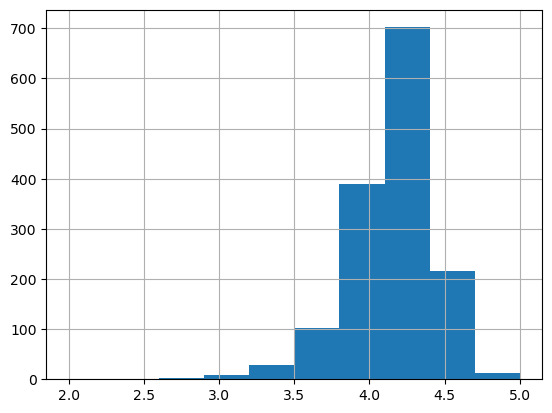

In [174]:
dados['rating'].hist()

In [15]:
dados.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [76]:
len(dados['product_id'].unique())

1351